
importing necessary modules


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

DATA COLLECTION

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(5572, 5)

DATA PREPROCESSING

In [4]:
#dropping the null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
df.head(10)

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


EXPLORATORY DATA ANALYSIS

In [7]:
df['message_type'].value_counts()

message_type
ham     4825
spam     747
Name: count, dtype: int64

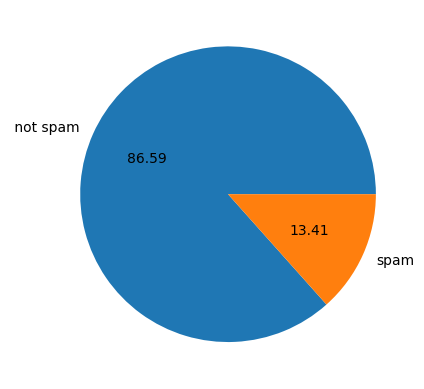

In [8]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

lABEL ENCODING

In [9]:
#labelling the spam as 1 and ham as 0
df.loc[df['message_type']=='spam','message_type']=0
df.loc[df['message_type']=='ham','message_type']=1

SPAM=0
HAM=1

In [10]:
df.head(5)

,message_type,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#chekcking  the both columns
df["message_type"]

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: message_type, Length: 5572, dtype: object

In [12]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

Training and testing the data

In [13]:
X=df['message']
y=df['message_type'].astype('int')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_test)
print(y_train)


(4457,)
(1115,)
2095    1
5343    1
564     1
3849    1
3317    1
       ..
3473    1
884     1
5006    1
3397    1
1309    1
Name: message_type, Length: 1115, dtype: int32
1658    0
1509    1
3266    1
5199    1
3217    1
       ..
3046    1
1725    1
4079    1
2254    1
2915    1
Name: message_type, Length: 4457, dtype: int32


extracting the features 

In [16]:
#converting the text data as vectors from further processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
#making TfidfVectorizer class instance
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Define a custom tokenizer function that performs the preprocessing
def custom_tokenizer(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation using translation method
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Split text into words using whitespace as the separator
    tokens = text.split()
    return tokens

# Create the TfidfVectorizer with custom tokenizer
feature = TfidfVectorizer(min_df=1, stop_words="english", tokenizer=custom_tokenizer)


In [18]:
#applying the vectorizer
X_train_features=feature.fit_transform(X_train)
X_test_features=feature.transform(X_test)

c:\Users\gudiv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
#vectorizer values after converting
print(X_train_features)
X_train_features.dtype

  (0, 583)	0.24749547760473498
  (0, 4620)	0.2700362270309487
  (0, 4788)	0.2832217201834357
  (0, 328)	0.19515747823219307
  (0, 1667)	0.2832217201834357
  (0, 7119)	0.2832217201834357
  (0, 13)	0.2832217201834357
  (0, 1230)	0.22235178515622203
  (0, 250)	0.2832217201834357
  (0, 8246)	0.2832217201834357
  (0, 7984)	0.17207920537095434
  (0, 7639)	0.2700362270309487
  (0, 2055)	0.17727028630379452
  (0, 1177)	0.20834297138468003
  (0, 446)	0.1985837418735473
  (0, 6106)	0.2832217201834357
  (1, 5041)	0.37642790852471786
  (1, 3372)	0.2448395929181141
  (1, 4437)	0.31141967973605056
  (1, 7788)	0.18812514912012895
  (1, 4546)	0.21920658878623833
  (1, 2507)	0.3601213111081844
  (1, 4436)	0.5860363476155348
  (1, 7514)	0.38053229397370614
  (2, 2691)	0.6500094538670909
  :	:
  (4454, 1670)	0.1906315876795497
  (4454, 2899)	0.23462769840481076
  (4454, 815)	0.1990921128517737
  (4454, 3634)	0.22212774511014408
  (4454, 4284)	0.1663244895290465
  (4454, 4836)	0.1636420437976499
  (4454, 

dtype('float64')

MODEL TRAINING

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()


In [21]:
model.fit(X_train_features,y_train)


LogisticRegression()

MODEL EVALUATION

In [22]:
pred_train_data=model.predict(X_train_features)
accuracy_on_Trianing=accuracy_score(y_train,pred_train_data)

In [23]:
print(accuracy_on_Trianing)

0.9661207089970832


TESTING THE MODEL

In [24]:
input_mail=['helllo']
input_data_features=feature.transform(input_mail)
prediction=model.predict(input_data_features)
print(prediction)

[1]


In [25]:
if prediction[0]==0:
    print("this is spam")
else:
    print("this is not a spam message")


this is not a spam message
